In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

## 데이터 불러오기

In [2]:
train = pd.read_csv("data/FIFA_train.csv")
test = pd.read_csv("data/FIFA_test.csv")

In [3]:
train.shape, test.shape

((8932, 12), (3828, 11))

In [4]:
set(train.columns)-set(test.columns)

{'value'}

## 데이터 탐색

C:\Users\moksu\AppData\Local\Temp\ipykernel_21948\3069110735.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(), annot= True, cmap= "Blues")


<AxesSubplot: >

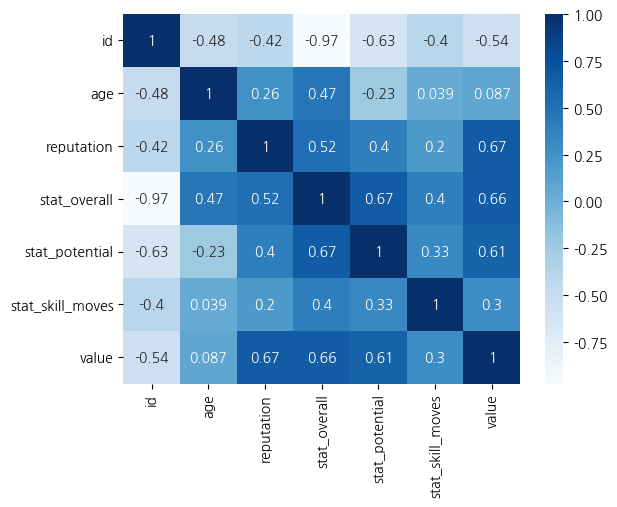

In [5]:
sns.heatmap(train.corr(), annot= True, cmap= "Blues")

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8932 entries, 0 to 8931
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                8932 non-null   int64  
 1   name              8932 non-null   object 
 2   age               8932 non-null   int64  
 3   continent         8932 non-null   object 
 4   contract_until    8932 non-null   object 
 5   position          8932 non-null   object 
 6   prefer_foot       8932 non-null   object 
 7   reputation        8932 non-null   float64
 8   stat_overall      8932 non-null   int64  
 9   stat_potential    8932 non-null   int64  
 10  stat_skill_moves  8932 non-null   float64
 11  value             8932 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 837.5+ KB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3828 entries, 0 to 3827
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                3828 non-null   int64  
 1   name              3828 non-null   object 
 2   age               3828 non-null   int64  
 3   continent         3828 non-null   object 
 4   contract_until    3828 non-null   object 
 5   position          3828 non-null   object 
 6   prefer_foot       3828 non-null   object 
 7   reputation        3828 non-null   float64
 8   stat_overall      3828 non-null   int64  
 9   stat_potential    3828 non-null   int64  
 10  stat_skill_moves  3828 non-null   float64
dtypes: float64(2), int64(4), object(5)
memory usage: 329.1+ KB


In [8]:
train.head()

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,0,L. Messi,31,south america,2021,ST,left,5.0,94,94,4.0,110500000.0
1,3,De Gea,27,europe,2020,GK,right,4.0,91,93,1.0,72000000.0
2,7,L. Suárez,31,south america,2021,ST,right,5.0,91,91,3.0,80000000.0
3,8,Sergio Ramos,32,europe,2020,DF,right,4.0,91,91,3.0,51000000.0
4,9,J. Oblak,25,europe,2021,GK,right,3.0,90,93,1.0,68000000.0


In [9]:
test.head()

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves
0,1,Cristiano Ronaldo,33,europe,2022,ST,right,5.0,94,94,5.0
1,2,Neymar Jr,26,south america,2022,ST,right,5.0,92,93,5.0
2,4,K. De Bruyne,27,europe,2023,MF,right,4.0,91,92,4.0
3,5,E. Hazard,27,europe,2020,ST,right,4.0,91,91,4.0
4,6,L. Modrić,32,europe,2020,MF,right,4.0,91,91,4.0


<AxesSubplot: xlabel='stat_skill_moves', ylabel='Density'>

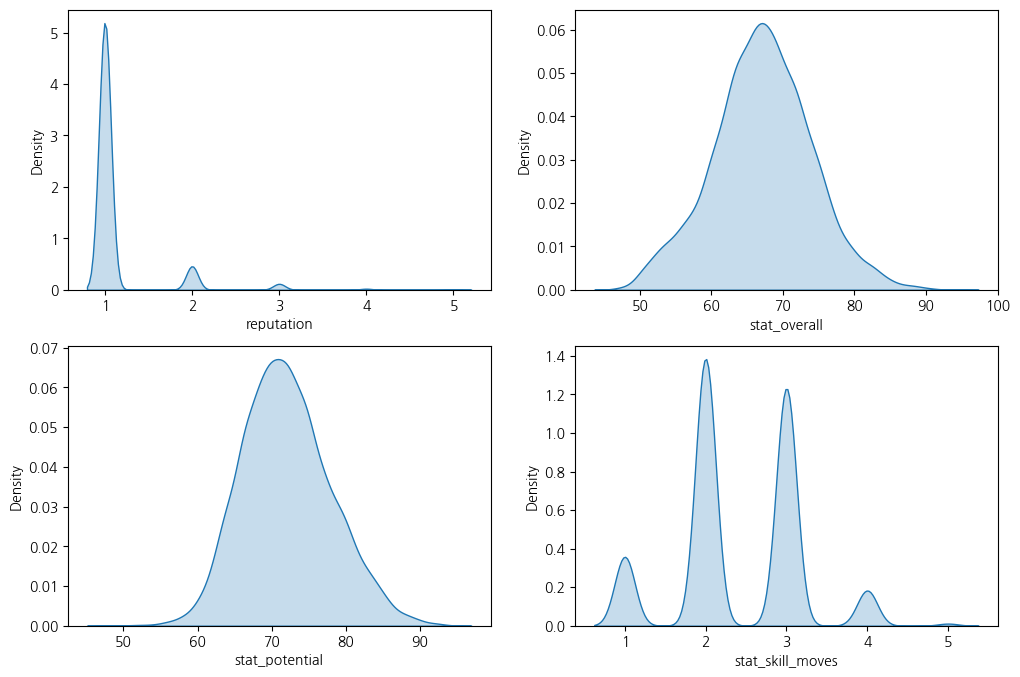

In [10]:
fig, axes = plt.subplots(nrows=2, ncols =2, figsize = (12,8))
sns.kdeplot(train["reputation"], fill=True, ax =axes[0][0])
sns.kdeplot(train["stat_overall"], fill=True, ax =axes[0][1])
sns.kdeplot(train["stat_potential"], fill=True, ax =axes[1][0])
sns.kdeplot(train["stat_skill_moves"], fill=True, ax =axes[1][1])

In [11]:
train.isnull().sum()

id                  0
name                0
age                 0
continent           0
contract_until      0
position            0
prefer_foot         0
reputation          0
stat_overall        0
stat_potential      0
stat_skill_moves    0
value               0
dtype: int64

In [12]:
test.isnull().sum()

id                  0
name                0
age                 0
continent           0
contract_until      0
position            0
prefer_foot         0
reputation          0
stat_overall        0
stat_potential      0
stat_skill_moves    0
dtype: int64

## 데이터 전처리

### 원핫인코딩을 위해 범주형데이터 데이터타입 변환


In [13]:
# reputation 칼럼 변환
reputation_list = ["score1", "score2", "score3", "score4","score5"]
train ["reputation"] = train["reputation"].map(lambda x : reputation_list[int(x)-1])
test ["reputation"] = test["reputation"].map(lambda x : reputation_list[int(x)-1])

In [14]:
train["reputation"].head()

0    score5
1    score4
2    score5
3    score4
4    score3
Name: reputation, dtype: object

In [15]:
test["reputation"].head()

0    score5
1    score5
2    score4
3    score4
4    score4
Name: reputation, dtype: object

In [16]:
# stat_skill_moves 칼럼 변환
stat_skill_moves_list = ["score1", "score2", "score3", "score4","score5"]
train ["stat_skill_moves"] = train["stat_skill_moves"].map(lambda x : stat_skill_moves_list[int(x)-1])
test ["stat_skill_moves"] = test["stat_skill_moves"].map(lambda x : stat_skill_moves_list[int(x)-1])

In [17]:
train["stat_skill_moves"].head()

0    score4
1    score1
2    score3
3    score3
4    score1
Name: stat_skill_moves, dtype: object

In [18]:
test["stat_skill_moves"].head()

0    score5
1    score5
2    score4
3    score4
4    score4
Name: stat_skill_moves, dtype: object

In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8932 entries, 0 to 8931
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                8932 non-null   int64  
 1   name              8932 non-null   object 
 2   age               8932 non-null   int64  
 3   continent         8932 non-null   object 
 4   contract_until    8932 non-null   object 
 5   position          8932 non-null   object 
 6   prefer_foot       8932 non-null   object 
 7   reputation        8932 non-null   object 
 8   stat_overall      8932 non-null   int64  
 9   stat_potential    8932 non-null   int64  
 10  stat_skill_moves  8932 non-null   object 
 11  value             8932 non-null   float64
dtypes: float64(1), int64(4), object(7)
memory usage: 837.5+ KB


In [20]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3828 entries, 0 to 3827
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                3828 non-null   int64 
 1   name              3828 non-null   object
 2   age               3828 non-null   int64 
 3   continent         3828 non-null   object
 4   contract_until    3828 non-null   object
 5   position          3828 non-null   object
 6   prefer_foot       3828 non-null   object
 7   reputation        3828 non-null   object
 8   stat_overall      3828 non-null   int64 
 9   stat_potential    3828 non-null   int64 
 10  stat_skill_moves  3828 non-null   object
dtypes: int64(4), object(7)
memory usage: 329.1+ KB


In [50]:
# contract_until 연도만 추출하여 데이터타입 변환
def contract (x):
    if len(x) > 5:
        return x.split()[2]
    else:
        return x


In [52]:
train["contract_until"] = train["contract_until"].map(lambda x: contract(x))

In [58]:
train["contract_until"] = train["contract_until"].astype(int)

In [59]:
train["contract_until"].unique()

array([2021, 2020, 2019, 2023, 2022, 2024, 2026, 2018, 2025])

In [61]:
test["contract_until"] = test["contract_until"].map(lambda x: contract(x))

In [62]:
test["contract_until"] = test["contract_until"].astype(int)

In [63]:
test["contract_until"].unique()

array([2022, 2023, 2020, 2021, 2019, 2025, 2024, 2018, 2026])

In [68]:
# name 칼럼 제거
train = train.drop(columns="name")
test = test.drop(columns="name")


## 인코딩

In [73]:
train_ohe = pd.get_dummies(train)

In [75]:
train_ohe.head()

,id,age,contract_until,stat_overall,stat_potential,value,continent_africa,continent_asia,continent_europe,continent_oceania,...,reputation_score1,reputation_score2,reputation_score3,reputation_score4,reputation_score5,stat_skill_moves_score1,stat_skill_moves_score2,stat_skill_moves_score3,stat_skill_moves_score4,stat_skill_moves_score5
0,0,31,2021,94,94,110500000.0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,3,27,2020,91,93,72000000.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0
2,7,31,2021,91,91,80000000.0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3,8,32,2020,91,91,51000000.0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
4,9,25,2021,90,93,68000000.0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0


In [76]:
test_ohe = pd.get_dummies(test)

In [77]:
test_ohe.head()

,id,age,contract_until,stat_overall,stat_potential,continent_africa,continent_asia,continent_europe,continent_oceania,continent_south america,...,reputation_score1,reputation_score2,reputation_score3,reputation_score4,reputation_score5,stat_skill_moves_score1,stat_skill_moves_score2,stat_skill_moves_score3,stat_skill_moves_score4,stat_skill_moves_score5
0,1,33,2022,94,94,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
1,2,26,2022,92,93,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
2,4,27,2023,91,92,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3,5,27,2020,91,91,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
4,6,32,2020,91,91,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0


## 학습데이터셋 나누기

In [79]:
train_ohe.columns

Index(['id', 'age', 'contract_until', 'stat_overall', 'stat_potential',
       'value', 'continent_africa', 'continent_asia', 'continent_europe',
       'continent_oceania', 'continent_south america', 'position_DF',
       'position_GK', 'position_MF', 'position_ST', 'prefer_foot_left',
       'prefer_foot_right', 'reputation_score1', 'reputation_score2',
       'reputation_score3', 'reputation_score4', 'reputation_score5',
       'stat_skill_moves_score1', 'stat_skill_moves_score2',
       'stat_skill_moves_score3', 'stat_skill_moves_score4',
       'stat_skill_moves_score5'],
      dtype='object')

In [80]:
feature_names = ['age', 'contract_until', 'stat_overall', 'stat_potential', 'continent_africa', 'continent_asia', 'continent_europe',
       'continent_oceania', 'continent_south america', 'position_DF',
       'position_GK', 'position_MF', 'position_ST', 'prefer_foot_left',
       'prefer_foot_right', 'reputation_score1', 'reputation_score2',
       'reputation_score3', 'reputation_score4', 'reputation_score5',
       'stat_skill_moves_score1', 'stat_skill_moves_score2',
       'stat_skill_moves_score3', 'stat_skill_moves_score4',
       'stat_skill_moves_score5']

In [81]:
label_name = "value"

In [84]:
X_train = train_ohe[feature_names]
X_train.shape

(8932, 25)

In [85]:
X_test = test_ohe[feature_names]
X_test.shape

(3828, 25)

In [87]:
y_train = train_ohe[label_name]
y_train.shape

(8932,)

## 알고리즘 불러오기

In [88]:
from sklearn.ensemble import GradientBoostingRegressor
model_gbt = GradientBoostingRegressor(random_state=42)
model_gbt

GradientBoostingRegressor(random_state=42)

In [89]:
model_gbt.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [90]:
from sklearn.model_selection import cross_val_predict
y_val_pred = cross_val_predict(model_gbt, X_train, y_train)

In [92]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train, y_val_pred)**0.5

4925190.821764735